In [3]:
import pandas as pd
from pathlib import Path

from datatype_recovery import basic_dataset

basic_dataset


<module 'datatype_recovery.experiments.basic_dataset' from '/home/cls0027/dev/datatype-recovery-experiments/datatype_recovery/experiments/basic_dataset.py'>

In [4]:
with open(Path.home()/'test_builds'/'astera3.exp'/'test.csv', 'r') as f:
    df = pd.read_csv(f)


In [5]:
total_vars = len(df)
print(f'Total vars = {total_vars}')
dwarf_vars = len(df[~df.Name_DWARF.isna()])
print(f'DWARF vars = {dwarf_vars}')
print(f'Stripped vars = {len(df[~df.Name_Strip.isna()])}')
print(f'Debug vars = {len(df[~df.Name_Debug.isna()])}')

Total vars = 22160
DWARF vars = 5037
Stripped vars = 14553
Debug vars = 19618


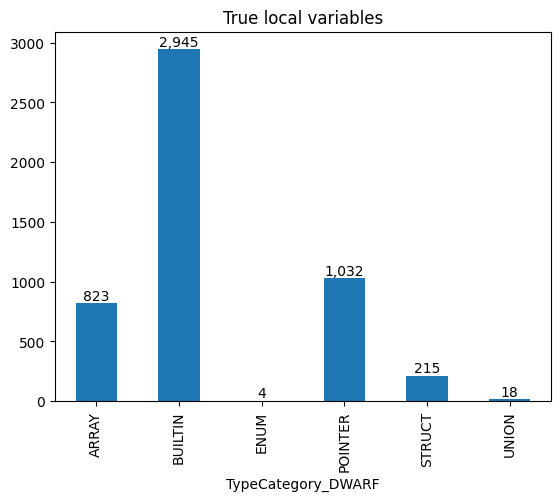

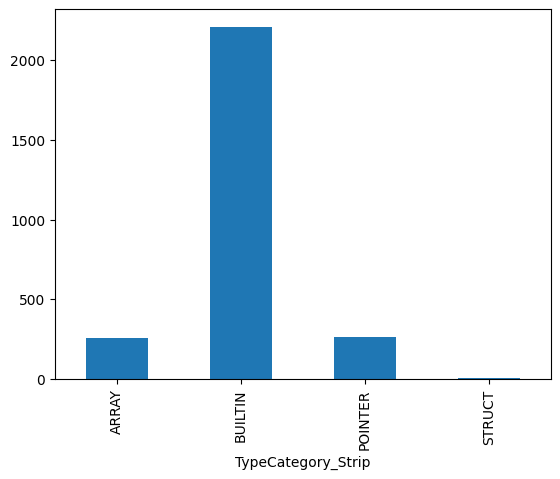

In [27]:

#df.groupby('TypeCategory_DWARF').count().Name_DWARF.plot.bar()
true_vars = df[~df.Name_DWARF.isna()]
ax = true_vars.groupby('TypeCategory_DWARF').count().Name_DWARF.plot.bar()
ax.set_title('True local variables')
for c in ax.containers:
    ax.bar_label(c, fmt=lambda x: f'{int(x):,}')

# this is how I can display multiple plots from one cell:
# display(df)
# display(df[df.FunctionStart==1369447])

import matplotlib.pyplot as plt
f = plt.figure()
ax2 = true_vars.groupby('TypeCategory_Strip').count().Name_Strip.plot.bar(fig=f)
# display(ax2.figure)

In [14]:
def is_notebook() -> bool:
    try:
        shell = get_ipython().__class__.__name__
        if shell == 'ZMQInteractiveShell':
            return True   # Jupyter notebook or qtconsole
        elif shell == 'TerminalInteractiveShell':
            return False  # Terminal running IPython
        else:
            return False  # Other type (?)
    except NameError:
        return False      # Probably standard Python interpreter

is_notebook()

True

In [7]:
true_vars[true_vars.TypeCategory_DWARF=='STRUCT'].Size_DWARF.mean()

532.8883720930232

In [8]:
gb1 = df.groupby('TypeCategory_DWARF').count().Name_DWARF
gb2 = df.groupby('TypeCategory_Debug').count().Name_Debug
gb3 = df.groupby('TypeCategory_Strip').count().Name_Strip

categories_df = pd.DataFrame({
    'DWARF': gb1,
    'Debug': gb2,
    'Strip': gb3
})

# cats_pcnt_df = pd.DataFrame({
#     'DWARF': gb1/num_dwarf_locals,
#     'Debug': gb2/num_debug_locals,
#     'Strip': gb3/num_strip_locals
# })
categories_df = categories_df.loc['STRUCT',:]

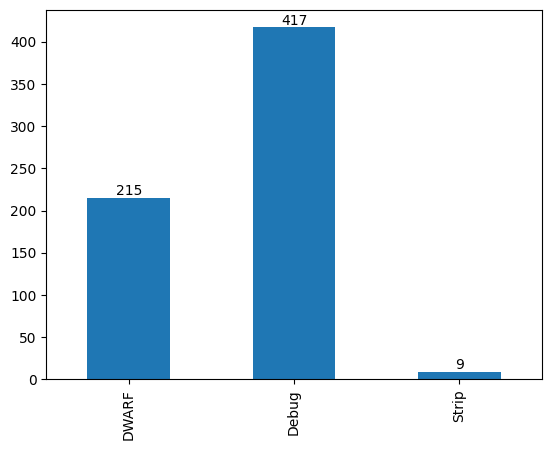

In [9]:
ax = categories_df.plot.bar()
for c in ax.containers:
    ax.bar_label(c, fmt=lambda x: f'{int(x):,}')

In [10]:
df[df.TypeCategory_Strip=='STRUCT']
df

,FunctionStart,Name_Debug,Type_Debug,LocType,LocRegName,LocOffset,TypeCategory_Debug,Name_Strip,Type_Strip,TypeCategory_Strip,Name_DWARF,Type_DWARF,FunctionName,TypeCategory_DWARF,BinaryId,TrueDebugVar,TrueStripVar,Size_DWARF,Size_Debug,Size_Strip
0,2009856,lVar1,long,reg,ebx,24.0,BUILTIN,lVar1,long,BUILTIN,NaN,NaN,NaN,NaN,0,False,False,-1,8,8
1,1369447,iVar1,int,reg,eax,0.0,BUILTIN,iVar1,int,BUILTIN,NaN,NaN,NaN,NaN,0,False,False,-1,4,4
2,1369447,name_local,char*,stack,NaN,-40.0,POINTER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,False,False,-1,8,-1
3,1369447,write_local,pak_write_t*,stack,NaN,-32.0,POINTER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,False,False,-1,8,-1
4,1369447,i,uint32_t,stack,NaN,-12.0,BUILTIN,local_c,uint,BUILTIN,i,unsigned int,__write_contains,BUILTIN,0,True,True,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22155,1997552,NaN,NaN,mem,NaN,1243744.0,NaN,NaN,NaN,NaN,__PRETTY_FUNCTION__,char[22],_glfwCreateContextEGL,ARRAY,0,False,False,22,-1,-1
22156,2004737,NaN,NaN,mem,NaN,1244560.0,NaN,NaN,NaN,NaN,__PRETTY_FUNCTION__,char[25],glfwGetOSMesaDepthBuffer,ARRAY,0,False,False,25,-1,-1
22157,2004425,NaN,NaN,mem,NaN,1244528.0,NaN,NaN,NaN,NaN,__PRETTY_FUNCTION__,char[25],glfwGetOSMesaColorBuffer,ARRAY,0,False,False,25,-1,-1
22158,2002727,NaN,NaN,mem,NaN,1244496.0,NaN,NaN,NaN,NaN,__PRETTY_FUNCTION__,char[25],_glfwCreateContextOSMesa,ARRAY,0,False,False,25,-1,-1
